# Imports (Regressive model)

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import sqlite3

C:\Users\AdvancedGaming\AppData\Local\Temp\ipykernel_1456\507136620.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data inlezen  


In [31]:
con_sales = sqlite3.connect("go_sales.sqlite")
con_sales

### Kolommen selecteren

In [32]:
sql_query = "SELECT * FROM ORDER_DETAILS;"
df = pd.read_sql(sql_query, con_sales)
df

,ORDER_DETAIL_CODE,ORDER_NUMBER,PRODUCT_NUMBER,QUANTITY,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE,TRIAL879
0,100000,8462,96,16,16.1,22.54,22.54,T
1,100001,9111,96,20,16.1,22.54,22.54,T
2,100002,8451,96,24,16.1,22.54,22.54,T
3,100003,8453,96,18,16.1,22.54,22.54,T
4,100004,8439,96,20,16.1,22.54,22.54,T
...,...,...,...,...,...,...,...,...
43058,99995,8459,95,146,2.76,5.55,5.55,T
43059,99996,8457,95,172,2.76,5.55,5.55,T
43060,99997,9267,95,192,2.76,5.55,5.55,T
43061,99998,8441,95,192,2.76,5.55,5.55,T


### Verticaal en horizontaal snijden

In [33]:
df = df.loc[:, ['PRODUCT_NUMBER', 'UNIT_COST', 'UNIT_PRICE', 'UNIT_SALE_PRICE', 'QUANTITY']]
df

,PRODUCT_NUMBER,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE,QUANTITY
0,96,16.1,22.54,22.54,16
1,96,16.1,22.54,22.54,20
2,96,16.1,22.54,22.54,24
3,96,16.1,22.54,22.54,18
4,96,16.1,22.54,22.54,20
...,...,...,...,...,...
43058,95,2.76,5.55,5.55,146
43059,95,2.76,5.55,5.55,172
43060,95,2.76,5.55,5.55,192
43061,95,2.76,5.55,5.55,192


In [34]:
x = df.drop('QUANTITY', axis=1)
y = df.loc[:, "QUANTITY"]
x

,PRODUCT_NUMBER,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE
0,96,16.1,22.54,22.54
1,96,16.1,22.54,22.54
2,96,16.1,22.54,22.54
3,96,16.1,22.54,22.54
4,96,16.1,22.54,22.54
...,...,...,...,...
43058,95,2.76,5.55,5.55
43059,95,2.76,5.55,5.55
43060,95,2.76,5.55,5.55
43061,95,2.76,5.55,5.55


### Regressiemodel bouwen

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [36]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(x_train, y_train)
reg_model

LinearRegression()

In [37]:
y_pred = reg_model.predict(x_test)
y_pred

array([57.89808413, 61.8132328 , 58.60124006, ..., 23.82326459,
       66.09407907, 55.61012671])

### Voorspelden hoeveelheid omzetten naar een dataframe

In [38]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns={0: "Predicted_Quantity"})
prediction_df

,Predicted_Quantity
0,57.898084
1,61.813233
2,58.601240
3,36.162148
4,57.594490
...,...
6455,59.399792
6456,56.870207
6457,23.823265
6458,66.094079


### Voorspelde en werkelijke hoeveelheden vergelijken

In [39]:
y_test_prediction_merge = pd.concat([y_test.reset_index()['QUANTITY'], prediction_df], axis=1)
y_test_prediction_merge.loc[y_test_prediction_merge['Predicted_Quantity'].notna(), :]

,QUANTITY,Predicted_Quantity
0,34,57.898084
1,24,61.813233
2,18,58.601240
3,52,36.162148
4,24,57.594490
...,...,...
6455,50,59.399792
6456,36,56.870207
6457,24,23.823265
6458,34,66.094079


### Voorspelde hoeveelheid met de daadwerkelijke hoeveelheid plotten

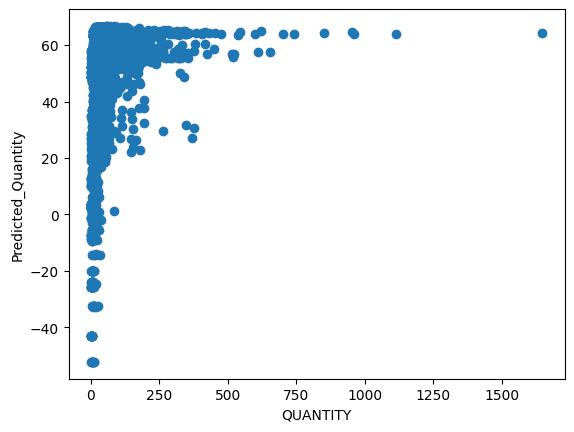

In [40]:
plt.scatter(y_test_prediction_merge['QUANTITY'], y_test_prediction_merge['Predicted_Quantity']) 
plt.xlabel('QUANTITY')
plt.ylabel('Predicted_Quantity')
plt.show()

### Errors

In [41]:
mean_squared_error(y_test_prediction_merge['QUANTITY'], y_test_prediction_merge['Predicted_Quantity'])

3646.7298556477044

In [42]:
mean_absolute_error(y_test_prediction_merge['QUANTITY'], y_test_prediction_merge['Predicted_Quantity'])

32.600159128136845